### Feature Matching + Homography

In [97]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

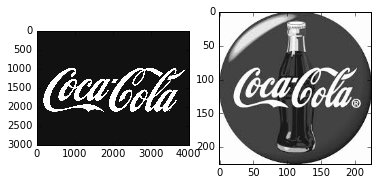

In [98]:
imgRef = cv2.imread('./Data/Reference/1.jpg', 0) #1 is colour, 0 is greyscale, -1 is unchanged
imgTest = cv2.imread('./Data/Test/1.jpg', 0)
#print imgRef
#plt.imshow(imgRef) #??? Why such a strange colour???

fig = plt.figure()
plt.subplot(121)
plt.imshow(imgRef, cmap='gray')
plt.subplot(122)
plt.imshow(imgTest, cmap='gray')
plt.show()

In [99]:
cv2.ocl.setUseOpenCL(False) # this is a temporary solution, see https://github.com/opencv/opencv/issues/6081
orb = cv2.ORB_create() # cv2.ORB_create() is for opencv3
#orb = cv2.ORB() # cv2.ORB() is opencv2

#detect key points
kpRef, descRef = orb.detectAndCompute(imgRef, None)
kpTest, descTest = orb.detectAndCompute(imgTest, None)

In [100]:
# create a BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descRef, descTest, k=2) 

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

In [101]:
MIN_MATCH_COUNT = 10

if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kpRef[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpTest[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h,w = imgRef.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    imgTest = cv2.polylines(imgTest,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None

AttributeError: 'list' object has no attribute 'queryIdx'

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

imgResult = cv2.drawMatches(imgRef,kpRef,imgTest,kpTest,good,None,**draw_params)

plt.imshow(imgResult, 'gray')
plt.show()

### Example of using knnMatch

In [ ]:
# create a BFMatcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(descRef, descTest, k=2) 

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
imgResult = cv2.drawMatchesKnn(imgRef,kpRef,imgTest,kpTest,good,outImg=None,flags=2)

plt.imshow(imgResult)
plt.show()